In [0]:
import re
import scipy
import pickle 
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import spacy as spy
!pip install joblib
warnings.filterwarnings("ignore")
from joblib import dump, load
import matplotlib.pyplot as plt 
from sklearn.externals import joblib
from astropy.table import Table, Column

from sklearn.model_selection import KFold
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_extraction.text import *


'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix'''


from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import nltk 
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [0]:
df = pd.read_excel("/content/drive/My Drive/Cap3 NLP/TREC_dataset.xlsx")

texts = df["Text"]
labels = df["Label"]

texts[2:60]
#labels.head()

2     manner How can I find a list of celebrities ' ...
3     animal What fowl grabs the spotlight after the...
4                   exp What is the full form of .com ?
5     ind What contemptible scoundrel stole the cork...
6     gr What team did baseball 's St. Louis Browns ...
7                 title What is the oldest profession ?
8                          def What are liver enzymes ?
9     ind Name the scar-faced bounty hunter of The O...
10                   date When was Ozzy Osbourne born ?
11    reason Why do heavier objects travel downhill ...
12               ind Who was The Pride of the Yankees ?
13                              ind Who killed Gandhi ?
14    event What is considered the costliest disaste...
15    state What sprawling U.S. state boasts the mos...
16    desc What did the only repealed amendment to t...
17    count How many Jews were executed in concentra...
18                  def What is `` Nine Inch Nails '' ?
19              def What is an annotated bibliog

In [0]:
Sentences =[str(texts)]


words =[sentence.split() for sentence in Sentences]

Sentences[0]
#print(Sentences)
#print(words)

"0       manner How did serfdom develop in and then lea...\n1       cremat What films featured the character Popey...\n2       manner How can I find a list of celebrities ' ...\n3       animal What fowl grabs the spotlight after the...\n4                     exp What is the full form of .com ?\n                              ...                        \n5447        other What 's the shape of a camel 's spine ?\n5448    currency What type of currency is used in China ?\n5449                 temp What is the temperature today ?\n5450           temp What is the temperature for cooking ?\n5451        currency What currency is used in Australia ?\nName: Text, Length: 5452, dtype: object"

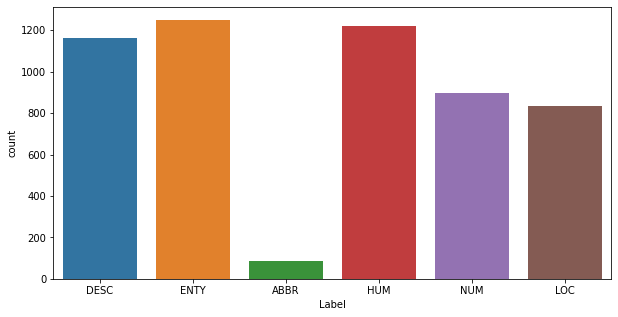

In [0]:
labels.value_counts()
plt.figure(figsize = (10,5))
sns.countplot(data= df, x = "Label")

plt.show()



In [0]:
df.head()

,Label,Text
0,DESC,manner How did serfdom develop in and then lea...
1,ENTY,cremat What films featured the character Popey...
2,DESC,manner How can I find a list of celebrities ' ...
3,ENTY,animal What fowl grabs the spotlight after the...
4,ABBR,exp What is the full form of .com ?


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df['Question_len'] = df['Text'].astype(str).apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

In [0]:
from google.colab import files
df.to_csv('wordCount_Trec.csv') 
files.download('wordCount_Trec.csv')

In [0]:
df.head()

,Label,Text,Question_len,word_count
0,DESC,manner How did serfdom develop in and then lea...,57,11
1,ENTY,cremat What films featured the character Popey...,55,9
2,DESC,manner How can I find a list of celebrities ' ...,58,13
3,ENTY,animal What fowl grabs the spotlight after the...,75,14
4,ABBR,exp What is the full form of .com ?,35,9


In [0]:
texts =str(texts)
tokens = nltk.word_tokenize(texts)
text = nltk.Text(tokens)


In [0]:
print(len(text))

text.concordance("Where")

113
No matches


In [0]:
type(text)
text.count("What")

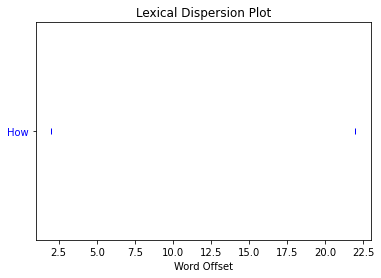

In [0]:
text.dispersion_plot(["How"])

In [0]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Text'], df['Label'])


In [0]:
#train_x.head()
valid_x.head()
train_y
#valid_y.head()

#valid_y.value_counts()

3079    ENTY
3810     NUM
4809     LOC
3961     HUM
3484     LOC
        ... 
2258    DESC
449     DESC
2049     LOC
3745     HUM
831      HUM
Name: Label, Length: 4089, dtype: object

In [0]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

train_y

array([2, 5, 4, ..., 4, 3, 3])

In [0]:
#CountVectors

#count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
#count_vect.fit(df['Text'])

count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df['Text'])

print(count_vect.get_feature_names())



#print(xtrain_count)


['000', '000th', '007', '10', '100', '103', '11', '111', '11th', '12', '123', '12601', '13', '137', '139', '14', '15', '155', '1562', '15th', '16', '1603', '1642', '1649', '165', '1669', '168', '1699', '16th', '17', '172', '173', '175', '1767', '1779', '1781', '1787', '1789', '1797', '18', '1800s', '1812', '1815', '1830', '1832', '1834', '1835', '1842', '1847', '1849', '185', '1853', '1857', '1863', '1865', '1866', '1870', '1872', '1873', '1879', '187s', '188', '1880', '1881', '1885', '1886', '1891', '1892', '1893', '1895', '1896', '1898', '1899', '19', '1900s', '191', '1912', '1913', '1915', '1916', '1919', '192', '1920s', '1922', '1923', '1925', '1926', '1927', '1928', '1929', '193', '1930s', '1931', '1932', '1933', '1935', '1936', '1937', '1939', '194', '1940', '1940s', '1941', '1942', '1943', '1945', '1946', '1948', '195', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '196', '1960', '1960s', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '

In [0]:

count_vect = CountVectorizer(analyzer='word', stop_words = 'english',token_pattern=r'\w{1,}')
count_vect.fit(df['Text'])

print(count_vect.get_feature_names())

['0', '000', '000th', '007', '1', '10', '100', '103', '11', '111', '11th', '12', '123', '12601', '13', '137', '139', '14', '15', '155', '1562', '15th', '16', '1603', '1642', '1649', '165', '1669', '168', '1699', '16th', '17', '172', '173', '175', '1767', '1779', '1781', '1787', '1789', '1797', '18', '1800s', '1812', '1815', '1830', '1832', '1834', '1835', '1842', '1847', '1849', '185', '1853', '1857', '1863', '1865', '1866', '1870', '1872', '1873', '1879', '187s', '188', '1880', '1881', '1885', '1886', '1891', '1892', '1893', '1895', '1896', '1898', '1899', '19', '1900s', '191', '1912', '1913', '1915', '1916', '1919', '192', '1920s', '1922', '1923', '1925', '1926', '1927', '1928', '1929', '193', '1930s', '1931', '1932', '1933', '1935', '1936', '1937', '1939', '194', '1940', '1940s', '1941', '1942', '1943', '1945', '1946', '1948', '195', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '196', '1960', '1960s', '1961', '1962', '1963', '1964', '1965', '1966',

In [0]:
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)


In [0]:
# TF-IDF

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['Text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [0]:
print(xtrain_tfidf)

  (0, 4772)	0.06941556364171167
  (0, 4703)	0.147338223617916
  (0, 4124)	0.4180015498309213
  (0, 3891)	0.33019591031404755
  (0, 3889)	0.2525811091177255
  (0, 3857)	0.4180015498309213
  (0, 1657)	0.3099880219446398
  (0, 1616)	0.12074308806797865
  (0, 1251)	0.20174053008641837
  (0, 204)	0.3989813117103801
  (0, 44)	0.37501864560715714
  (1, 4772)	0.08972934975194283
  (1, 4256)	0.19789370597774203
  (1, 4239)	0.3501975940623063
  (1, 4189)	0.10051594148174864
  (1, 3795)	0.5403256171083658
  (1, 2571)	0.31588851770011506
  (1, 1774)	0.5157392922390286
  (1, 1678)	0.1330124942884123
  (1, 316)	0.3803002054090256
  (2, 4814)	0.24557037453436736
  (2, 4779)	0.15369079532516583
  (2, 4778)	0.16961169230724865
  (2, 4772)	0.057606683655581616
  (2, 4495)	0.22482857698025685
  :	:
  (4086, 4189)	0.20559224069340984
  (4086, 3301)	0.527438708437647
  (4086, 2267)	0.14480014311198983
  (4086, 2145)	0.23576074555059945
  (4086, 1678)	0.13602984928484962
  (4086, 1533)	0.43191127354124514
 

In [0]:
# Defining Model, returning Accuracy

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return metrics.accuracy_score(predictions, valid_y)

In [0]:
#NB Accuracy for Count Vectors

accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.9068231841526045


In [0]:
# SVM

accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print(" SVM, Count vectors: ", accuracy)

 SVM, Count vectors:  0.9427732942039618


In [0]:
# SVM

accuracy = train_model(svm.LinearSVC(), xtrain_count, train_y, xvalid_count)
print("Linear SVM, Count vectors: ", accuracy)

Linear SVM, Count vectors:  0.9596478356566398


In [0]:
# NB Accuracy for TF-IDF

accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.9317681584739546


In [0]:
classify =svm.SVC()

classify.fit(xtrain_count,train_y)

pred =classify.predict(xvalid_count)

print(pred)


[2 3 3 ... 4 2 2]


In [0]:
print(valid_x)

2459    cremat What Ernest Hemingway novel had the wor...
998               ind Who was the Charlie perfume woman ?
4629                    ind Who wrote The Ugly Duckling ?
3965         other What are some good fractal web sites ?
4499    reason Why does it say on children 's cough sy...
                              ...                        
1611                         def What is a bourdon tube ?
2164                    reason Why can 't ostriches fly ?
418     city What Nevada center has been dubbed The Bi...
253     gr What schools in the Washington , DC NN NN V...
3422    food What fast food is prepared with a `` secr...
Name: Text, Length: 1363, dtype: object


In [0]:


testing = pd.read_excel("/content/drive/My Drive/NLP/Test.xlsx")

testing

,Text
0,Madagascar teetering on the brink of catastro...
1,You bite up because of your lower jaw.
2,All the glaciers have started melting
3,territory announces home loan help
4,israel seeks act of goodwill before reopening
...,...
104,New findings indicate the planet could be in ...
105,This book is sure to liquefy your brain.
106,"Global warming of course is a worry, it is a w..."
107,Climate change could cause fish extinction in...


In [0]:
test_x = testing["Text"]

test_x

xtest_count =  count_vect.transform(test_x)

print(xtest_count)

  (0, 191)	1
  (0, 2441)	1
  (0, 2832)	1
  (0, 3278)	1
  (0, 6091)	1
  (0, 8104)	1
  (1, 979)	1
  (2, 7005)	1
  (3, 3545)	1
  (3, 3630)	1
  (3, 7358)	1
  (4, 319)	1
  (4, 3936)	1
  (6, 643)	1
  (6, 1468)	1
  (6, 1611)	1
  (6, 5794)	1
  (6, 5974)	1
  (7, 1468)	1
  (7, 1611)	1
  (7, 1882)	1
  (7, 5895)	1
  (8, 6126)	1
  (8, 6597)	1
  (9, 1468)	1
  :	:
  (103, 7634)	1
  (104, 2393)	1
  (104, 3278)	1
  (104, 3807)	1
  (104, 5088)	1
  (104, 5628)	1
  (104, 7412)	1
  (105, 1055)	1
  (105, 1108)	1
  (106, 1930)	1
  (106, 2657)	1
  (106, 3278)	1
  (106, 6403)	1
  (106, 8056)	1
  (107, 17)	1
  (107, 182)	1
  (107, 1032)	1
  (107, 1410)	1
  (107, 1468)	1
  (107, 1611)	1
  (107, 2791)	1
  (107, 2964)	1
  (107, 7935)	1
  (108, 770)	1
  (108, 826)	1


In [0]:

test_pred = classify.predict(xtest_count)

test_pred = pd.DataFrame(test_pred)

test_pred

,0
0,2
1,4
2,4
3,4
4,4
...,...
104,4
105,4
106,4
107,2
